In [252]:
# Read CSV and convert to Pandas DataFrame

from pathlib import Path
import pandas as pd

ROOT_PATH = Path('.') 
DATA_FILE_PATH = ROOT_PATH.joinpath('videogamesales').joinpath('vgsales.csv')  #videogamesales vgsales.csv netflix-shows netflix_titles.csv
DB_NAME = ROOT_PATH.joinpath('videogame_sales.db')
TABLE_NAME = 'game_sales'


# Read CSV
csv_data = pd.read_csv(DATA_FILE_PATH)

# Convert to DataFrame
df = pd.DataFrame(csv_data)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [254]:
# Create a DB file and load the data from the DataFrame into the DB.

import sqlite3
from _sqlite3 import Error


def sql_connection(db_name):
    try:
        db = sqlite3.connect(db_name)
        print("Connection to database has been established")
        return db
    except Error:
        print(Error)

def insert_data(db, data_df):
    data_df.columns = data_df.columns
    data_df.to_sql(TABLE_NAME, con=db, if_exists='replace', index_label='id')

db = sql_connection(DB_NAME)
    
insert_data(db, df)
db.close()

Connection to database has been established


Connection to database has been established
This query will print the top-10 games for a chosen year
DB contains data from 1980 to 2020.
Enter a year: 2000
Connection to database has been established
                                 Name  N.Am_Sales
0            Tony Hawk's Pro Skater 2        3.05
1             Pokémon Crystal Version        2.55
2                            Driver 2        2.36
3                      WWF SmackDown!        2.01
4        Midnight Club: Street Racing        2.00
5         Rugrats in Paris: The Movie        1.96
6           Spyro: Year of the Dragon        1.93
7  The Legend of Zelda: Majora's Mask        1.90
8    WWF SmackDown! 2: Know Your Role        1.76
9                          Spider-Man        1.70


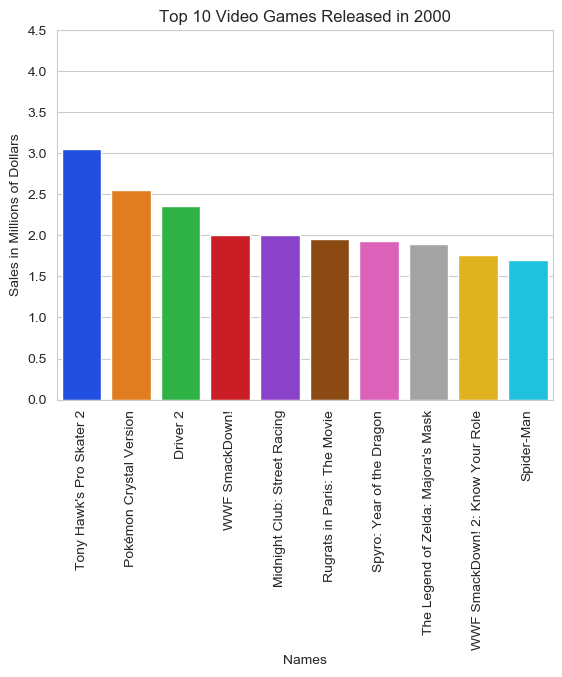

In [251]:
# This query will print the top-10 games for a chosen year and then show a bargraph

#import numpy as np
import seaborn as sns
import operator

TABLE_NAME = 'game_sales'


def year_query(cur, date_string):
    db = sql_connection(DB_NAME)
    cur = db.cursor()
    ex_str = f'SELECT "Name", "NA_Sales" FROM {TABLE_NAME} WHERE Year LIKE "%{date_string}%" '
    cur.execute(ex_str)
    db_response = cur.fetchall()
    db.close()
    return db_response


# Get data to build user input request
db = sql_connection(DB_NAME)
cur = db.cursor()
cur.execute(f'SELECT min(Year) FROM {TABLE_NAME}')
min_year = int(cur.fetchone()[0])
cur.execute(f'SELECT max(Year) FROM {TABLE_NAME}')
max_year = int(cur.fetchone()[0])
db.close()

# Get user input
print("This query will print the top-10 games for a chosen year")
print("DB contains data from " + str(min_year) + " to " + str(max_year) + ".")
repeat = 1
while repeat == 1:
    selected_year = input("Enter a year: ")
    if int(selected_year) < min_year or int(selected_year) > max_year:
        print("Invalid year!")
    else:
        repeat = 0

# Get data from the DB        
year_db_response = year_query(cur, selected_year)

# Sort data and convert it to a Pandas DataFrame for printing later
year_db_response.sort(key = operator.itemgetter(1), reverse = True)
year_query = pd.DataFrame(year_db_response)
year_query.columns = ["Name", "N.Am_Sales"]
year_query["N.Am_Sales"] = year_query["N.Am_Sales"].apply(format_money)


# Build Seabourn plot
names = []
sales = []

for i in range(10):
    names.append(year_db_response[i][0])
    sales.append(year_db_response[i][1])
    
title = f'Top 10 Video Games Released in {selected_year}'
sns.set_style('whitegrid')

axes = sns.barplot(
    x=names, 
    y=sales,
    palette='bright')
axes.set_title(title)
axes.set(xlabel='Names', ylabel='Sales in Millions of Dollars')

axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

axes.set_ylim(top=max(sales) + 0.5)
min_sales = 0
max_sales = int( max(sales) + 2 )
yticks =  [i/2 for i in range(max_sales*2)]
axes.set_yticks(yticks)

# Print Pandas df
print(year_query.head(10))

Connection to database has been established
  Platform  N.Am_Sales
0      Wii       41.49
1      NES       29.08
2     X360       14.97
3     SNES       12.78
4       DS       11.38
5       GB       11.27
6      PS2        9.43
7     2600        7.28
8      PS3        7.01
9      N64        6.91


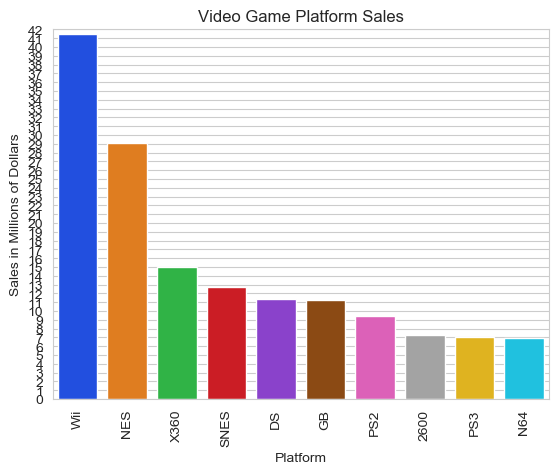

In [258]:
# This query will print the gross sales by genre

TABLE_NAME = 'game_sales'


def platform_query():
    db = sql_connection(DB_NAME)
    cur = db.cursor()
    ex_str = f'SELECT "Platform", "NA_Sales" FROM {TABLE_NAME} GROUP BY "Platform" '
    cur.execute(ex_str)
    db_response = cur.fetchall()
    db.close()
    return db_response


# Get data from the DB        
platform_db_response = platform_query()

# Convert it to a Pandas DataFrame for printing later
platform_db_response.sort(key = operator.itemgetter(1), reverse = True)
platform_query = pd.DataFrame(platform_db_response)
platform_query.columns = ["Platform", "N.Am_Sales"]



# Build Seabourn plot
platform = []
platform_sales = []

for i in range(10):
    platform.append(platform_db_response[i][0])
    platform_sales.append(platform_db_response[i][1])
    
title = f'Video Game Platform Sales'
sns.set_style('whitegrid')

axes = sns.barplot(
    x=platform, 
    y=platform_sales,
    palette='bright')
axes.set_title(title)
axes.set(xlabel='Platform', ylabel='Sales in Millions of Dollars')

axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

axes.set_ylim(top=max(sales) + 0.5)
min_sales = 0
max_sales = int( max(sales) + 2 )
yticks =  [i for i in range(max_sales)]
axes.set_yticks(yticks)

# Print Pandas df
print(platform_query.head(10))

Connection to database has been established
          genre  N.Am_Sales
0        Sports       41.49
1      Platform       29.08
2       Shooter       26.93
3        Puzzle       23.20
4        Racing       15.85
5          Misc       14.03
6  Role-Playing       11.27
7    Simulation        9.07
8        Action        7.01
9      Fighting        6.75


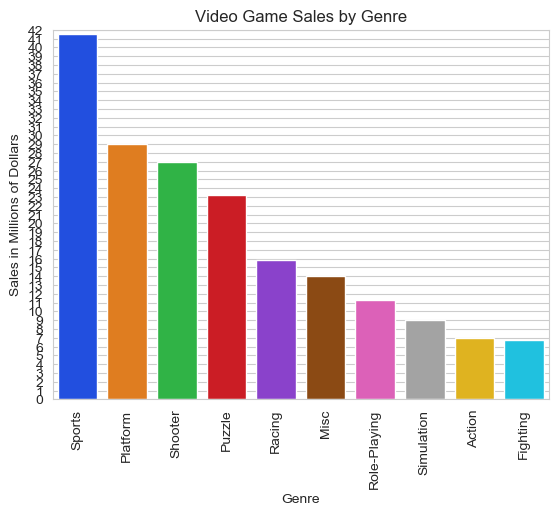

In [260]:
# This query will print the gross sales by console

TABLE_NAME = 'game_sales'


def genre_query():
    db = sql_connection(DB_NAME)
    cur = db.cursor()
    ex_str = f'SELECT "Genre", "NA_Sales" FROM {TABLE_NAME} GROUP BY "Genre" '
    cur.execute(ex_str)
    db_response = cur.fetchall()
    db.close()
    return db_response


# Get data from the DB        
genre_db_response = genre_query()

# Convert it to a Pandas DataFrame for printing later
genre_db_response.sort(key = operator.itemgetter(1), reverse = True)
genre_query = pd.DataFrame(genre_db_response)
genre_query.columns = ["Genre", "N.Am_Sales"]



# Build Seabourn plot
genre = []
genre_sales = []

for i in range(10):
    genre.append(genre_db_response[i][0])
    genre_sales.append(genre_db_response[i][1])
    
title = f'Video Game Sales by Genre'
sns.set_style('whitegrid')

axes = sns.barplot(
    x=genre, 
    y=genre_sales,
    palette='bright')
axes.set_title(title)
axes.set(xlabel='Genre', ylabel='Sales in Millions of Dollars')

axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

axes.set_ylim(top=max(sales) + 0.5)
min_sales = 0
max_sales = int( max(sales) + 2 )
yticks =  [i for i in range(max_sales)]
axes.set_yticks(yticks)

# Print Pandas df
print(genre_query.head(10))